In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
N = 65
x_0 = 5
d = 5
zero = np.zeros(2*N)
dx = 1 

### Zadanie 1

In [3]:
def GestoscLadunku(x,y):
    ro = np.exp(-(np.power((x-x_0),2)+np.power(y,2))/np.power(d,2)) - np.exp(-(np.power((x+x_0),2)+np.power(y,2))/np.power(d,2))
    return ro


In [4]:
siatka_1 = np.flip(np.fromfunction(lambda i, j: GestoscLadunku(i,j),(N,N)),0)
siatka_2 = np.flip(np.flip(np.fromfunction(lambda i, j: GestoscLadunku(i,-j),(N,N)),1),0)
siatka_3 = np.flip(np.fromfunction(lambda i, j: GestoscLadunku(-i,-j),(N,N)),1)
siatka_4 = np.fromfunction(lambda i, j: GestoscLadunku(-i,j),(N,N))

In [5]:
siatka_21 = np.concatenate((siatka_2, siatka_1), axis = 1)
siatka_34 = np.concatenate((siatka_3, siatka_4), axis = 1)
siatka = np.concatenate((siatka_21, siatka_34), axis = 0)
siatka[0], siatka.T[0], siatka[2*N-1], siatka.T[2*N-1] = 0,0,0,0

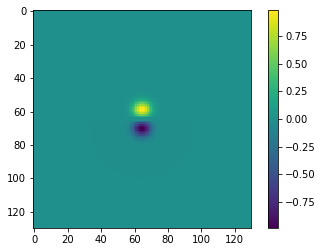

In [6]:
plt.imshow(siatka)
plt.colorbar()

In [7]:

siatka_ro = siatka

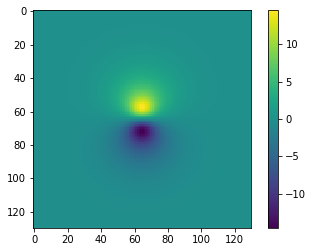

In [8]:
siatka_a = np.zeros((2*N,2*N))
siatka_b = np.zeros((2*N,2*N))
siatka_c = np.zeros((2*N,2*N))
temp = np.zeros((2*N,2*N))
for z in range(1000):
    for i in range(1,2*N-1):
        siatka_a[i] = temp[i-1] + temp[i+1]
        siatka_b.T[i] = temp.T[i-1] + temp.T[i+1]
    siatka_c = siatka_a + siatka_b
    temp = (siatka_c + siatka_ro * dx * dx)/4
plt.imshow(temp)
plt.colorbar()

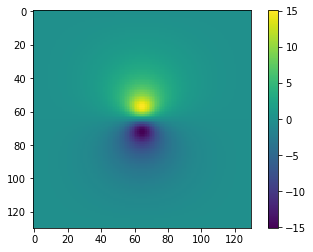

In [70]:
siatka_a = np.zeros((2*N,2*N))
siatka_b = np.zeros((2*N,2*N))
siatka_c = np.zeros((2*N,2*N))
temp = np.zeros((2*N,2*N))
for z in range(2000):
    for i in range(1,2*N-1):
        siatka_a[i] = temp[i-1] + temp[i+1]
        siatka_b.T[i] = temp.T[i-1] + temp.T[i+1]
    siatka_c = siatka_a + siatka_b
    temp = (siatka_c + siatka_ro * dx * dx)/4
po_2000 = temp
plt.imshow(temp)
plt.colorbar()

In [72]:
temp = np.zeros((2*N,2*N))
siatka_a = np.zeros((2*N,2*N))
siatka_b = np.zeros((2*N,2*N))
siatka_c = np.zeros((2*N,2*N))
siatka_d = np.zeros((2*N,2*N))
siatka_e = np.zeros((2*N,2*N))
a = np.zeros((1000))

for z in range(1000):
    for i in range(1,2*N-1):
        
        siatka_a[i] = temp[i-1] + temp[i+1]
        siatka_b.T[i] = temp.T[i-1] + temp.T[i+1]

        siatka_c[i] = 0.5 * np.power((temp[i+1] - temp[i-1])/(2*dx),2)
        siatka_d.T[i] = 0.5 * np.power((temp.T[i+1] - temp.T[i-1])/(2*dx),2)
        
    a_array = siatka_c + siatka_d - siatka_ro * temp
    siatka_e = siatka_a + siatka_b
    temp = (siatka_e + siatka_ro * dx * dx)/4
    a[z] = np.sum(np.sum(a_array,0))

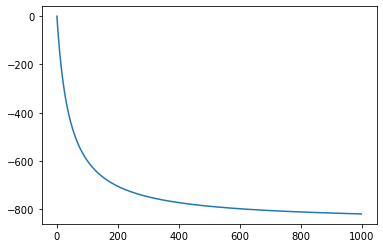

In [73]:
plt.plot(a)

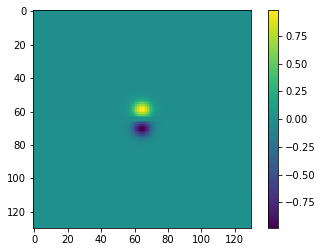

In [74]:
siatka_a = np.zeros((2*N,2*N))
siatka_b = np.zeros((2*N,2*N))
siatka_c = np.zeros((2*N,2*N))

for i in range(1,2*N-1):
    siatka_a[i] = temp[i-1] + temp[i+1]
    siatka_b.T[i] = temp.T[i-1] + temp.T[i+1]
siatka_c = siatka_a + siatka_b
temp = -(siatka_c - 4 * temp)/(dx*dx)
plt.imshow(temp)
plt.colorbar()

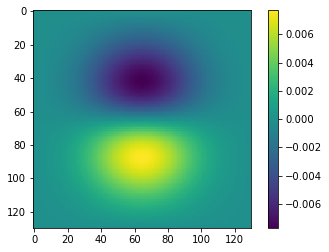

In [13]:
plt.imshow(temp - siatka_ro)
plt.colorbar()

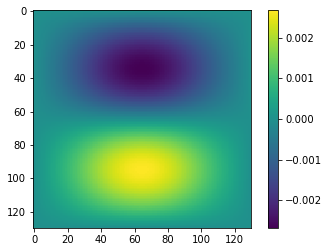

In [14]:
siatka_a = np.zeros((2*N,2*N))
siatka_b = np.zeros((2*N,2*N))
siatka_c = np.zeros((2*N,2*N))
temp = po_2000
for i in range(1,2*N-1):
    siatka_a[i] = temp[i-1] + temp[i+1]
    siatka_b.T[i] = temp.T[i-1] + temp.T[i+1]
siatka_c = siatka_a + siatka_b
temp = -(siatka_c - 4 * temp)/(dx*dx)
plt.imshow(temp - siatka_ro)
plt.colorbar()

### Zadanie 2

In [95]:
siatka_a = np.zeros((2*N,2*N))
siatka_b = np.zeros((2*N,2*N))
siatka_c = np.zeros((2*N,2*N))
siatka_d = np.zeros((2*N,2*N))
siatka_e = np.zeros((2*N,2*N))
w = [0,0.5, 1, 1.011]
a = np.zeros((len(w),1000))
temp = np.zeros((2*N,2*N))
ro = np.zeros((len(w),2*N,2*N))
for j in range(len(w)):
    for z in range(1000):
        for i in range(1,2*N-1):
            siatka_a[i] = temp[i-1] + temp[i+1]
            siatka_b.T[i] = temp.T[i-1] + temp.T[i+1]

            siatka_e[i] = 0.5 * np.power((temp[i+1] - temp[i-1])/(2*dx),2)
            siatka_d.T[i] = 0.5 * np.power((temp.T[i+1] - temp.T[i-1])/(2*dx),2)

        siatka_c = siatka_a + siatka_b
        temp = w[j]*(siatka_c + siatka_ro * dx * dx)/4 + (1-w[j]) * temp

        a_array = siatka_d + siatka_e - siatka_ro * temp
        a[j][z] = np.sum(np.sum(a_array,0))

    ro[j] = -(siatka_a + siatka_b - 4*temp)/(dx*dx)

    temp = np.zeros((2*N,2*N))

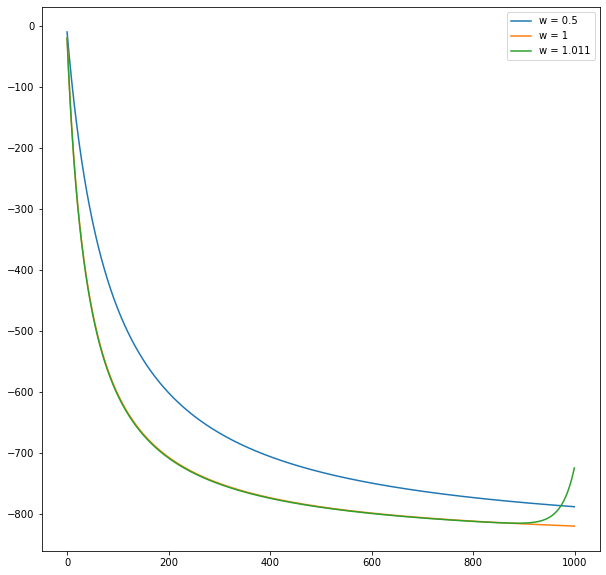

In [91]:
plt.figure(figsize=(10,10))
plt.plot(a[1],label="w = 0.5")
plt.plot(a[2],label="w = 1")
plt.plot(a[3],label="w = 1.011")

plt.legend()

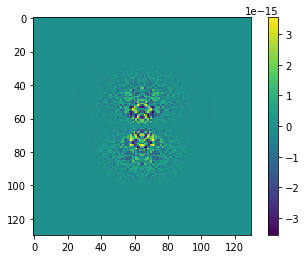

In [96]:
plt.imshow(ro[2]-siatka_ro)
plt.colorbar()